<a href="https://colab.research.google.com/github/ritesh97b/NumPy/blob/master/SALARY_PREDICTION_AND_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary prediction with visualization salaries in different sectors in different parts in india

## importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Importing datasets

In [2]:
dataset=pd.read_csv('Salary_experience.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
data=pd.read_csv('Salary_field.csv',usecols=["Crawl Timestamp","Job Title","Job Salary","Job Experience Required","Key Skills","Role Category","Location","Functional Area","Industry","Role"],na_values=" Not Disclosed by Recruiter ")
data.head()

,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,2019-07-05 01:46:07 +0000,Digital Media Planner,NaN,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,2019-07-06 08:04:50 +0000,Online Bidding Executive,NaN,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,NaN,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,NaN,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [4]:
data.columns

Index(['Crawl Timestamp', 'Job Title', 'Job Salary', 'Job Experience Required',
       'Key Skills', 'Role Category', 'Location', 'Functional Area',
       'Industry', 'Role'],
      dtype='object')

## null values in each columns

In [5]:
data.isnull().sum()

Crawl Timestamp                0
Job Title                    575
Job Salary                 19781
Job Experience Required      573
Key Skills                  1271
Role Category               2305
Location                     577
Functional Area              573
Industry                     573
Role                         901
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data

,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
3,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
5,2019-08-05 03:59:27 +0000,Opening For Adobe Analytics Specialist,"7,00,000 - 17,00,000 PA.",5 - 7 yrs,adobe experience manager| digital| digital ma...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",System Analyst
6,2019-07-06 09:20:22 +0000,Sales- Fresher-for Leading Property Consultant,"2,00,000 - 3,00,000 PA.",0 - 0 yrs,channel partners| real estate| negotiation| p...,Retail Sales,Bengaluru,"Sales , Retail , Business Development","Real Estate, Property",Sales Executive/Officer
10,2019-08-05 17:37:44 +0000,Executive Assistant To Chairman,"25,00,000 - 35,00,000 PA.",5 - 10 yrs,secretary| executive assistant| ea,Corporate Planning/Consulting/Strategy,Mumbai,"Strategy , Management Consulting , Corporate P...","Courier, Transportation, Freight , Warehousing",Corporate Planning/Strategy Manager
13,2019-08-04 09:37:17 +0000,Oracle IDAM,Openings: 1,3 - 7 Years,Oracle IDAM|OIM|OAM,Programming & Design,"Bengaluru,Hyderabad,Kolkata,Chennai","IT Software - Application Programming , Mainte...",IT-Software / Software Services,Software Developer
...,...,...,...,...,...,...,...,...,...,...
29983,2019-08-05 19:10:44 +0000,Accountant,"2,25,000 - 3,00,000 PA.",2 - 5 yrs,accounts receivable| accounts payable| Accoun...,Accounts,Delhi NCR,"Accounts , Finance , Tax , Company Secretary ,...","Accounting, Finance",Accounts Executive/Accountant
29986,2019-07-05 06:52:20 +0000,Developer – OOPS,Not Disclosed by Recruiter,3 - 5 Years,node.js|object oriented programming|oops|java|...,Programming & Design,Bengaluru,"IT Software - Application Programming , Mainte...",IT-Software / Software Services,Software Developer
29987,2019-07-04 22:50:54 +0000,International Non-voice / Day Rotational Shif...,"1,50,000 - 2,25,000 PA.",0 - 4 yrs,bpo| international bpo| customer service| cus...,Voice,Ahmedabad,"ITES , BPO , KPO , LPO , Customer Service , Op...","BPO, Call Centre, ITeS",Associate/Senior Associate -(NonTechnical)
29989,2019-07-05 17:39:23 +0000,Penetration Testing,"INR 7,00,000 - 8,00,000 PA.",0 - 4 Years,Web App|Mobile|Web Services|Burp Professional|...,Programming & Design,Bengaluru,"IT Software - Application Programming , Mainte...",IT-Software / Software Services,Testing Engineer


In [8]:
dataset.shape

(35, 2)

In [9]:
dataset.info

<bound method DataFrame.info of     YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872
30             11.2  127345
31             11.5  126756
32             12.3  128765
33             1

In [10]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## visualizing Job Oppurtunities with respect to Location

In [13]:
data.Location = data.Location.str.upper()
new_location =data.Location.str.strip().str.split(",", expand = True)[0].str.split(" ", expand = True)[0].value_counts().reset_index()
new_location.columns = ["Location", "Job_Opportunities"]
top_20_new_location = new_location[:20]
top_20_new_location.style.background_gradient(cmap = "Reds")

,Location,Job_Opportunities
0,BENGALURU,1651
1,DELHI,1463
2,MUMBAI,1449
3,PUNE,743
4,HYDERABAD,742
5,GURGAON,655
6,CHENNAI,531
7,NOIDA,416
8,KOLKATA,311
9,AHMEDABAD,283


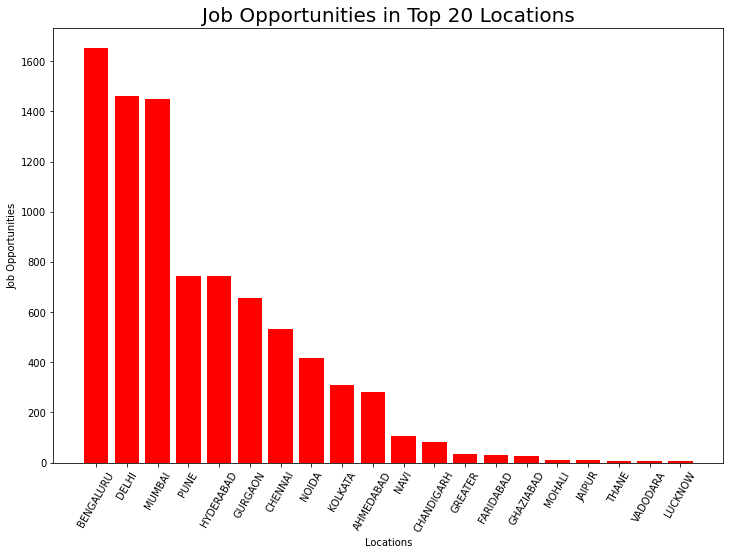

In [14]:
plt.figure(figsize = (12, 8))
plt.bar(top_20_new_location.Location, top_20_new_location.Job_Opportunities, color = "r")
plt.xlabel("Locations")
plt.ylabel("Job Opportunities")
plt.xticks(top_20_new_location.Location, rotation = "60")
plt.title("Job Opportunities in Top 20 Locations", fontdict={"fontsize" :20})
plt.show()

## visualizing job oppurtunities with respect to industries

In [15]:
import re
new_Industry = pd.DataFrame(data.Industry.str.split(",", expand = True).values.ravel("f"),columns = ["Industry"])
new_Industry = new_Industry.dropna()
new_Industry.Industry = new_Industry.Industry.str.upper()
new_Industry.Industry = new_Industry.Industry.apply(lambda x: re.sub("[^A-Za-z0-9 -]+", ",", x))
new_Industry = pd.DataFrame(new_Industry.Industry.str.split(",", expand = True).values.ravel("f"), columns = ["Industry"])
new_Industry = new_Industry.dropna()
new_Industry.Industry = new_Industry.Industry.str.lstrip().str.rstrip()
# pure 20 Industry
new_Industry = new_Industry.Industry.value_counts().reset_index()
new_Industry.columns =["Industry", "Job_Opportunities"]
top_20_new_Industry = new_Industry[:20]
top_20_new_Industry.style.background_gradient(cmap = "Greens")

,Industry,Job_Opportunities
0,IT-SOFTWARE,2446
1,SOFTWARE SERVICES,2446
2,ITES,1298
3,BPO,1298
4,CALL CENTRE,1298
5,FINANCIAL SERVICES,575
6,BANKING,575
7,BROKING,575
8,TRAINING,298
9,TEACHING,298


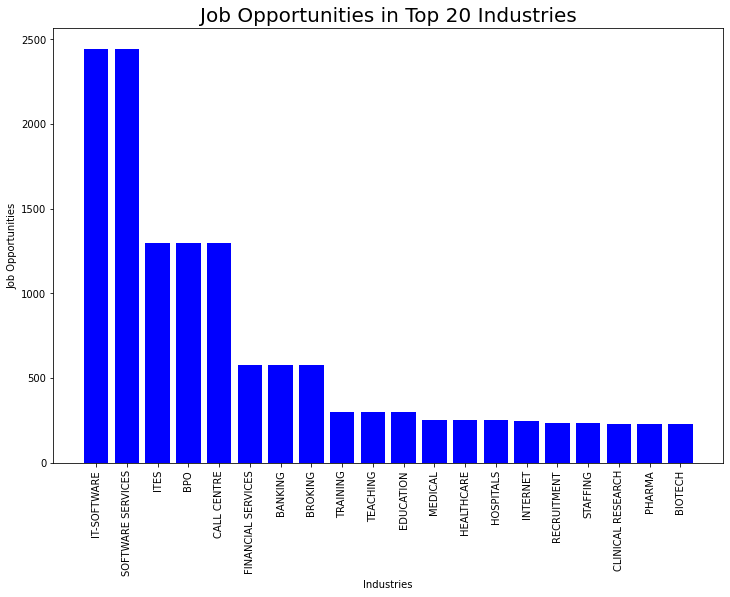

In [16]:
plt.figure(figsize = (12, 8))
plt.bar(top_20_new_Industry.Industry, top_20_new_Industry.Job_Opportunities, color = "b")
plt.xlabel("Industries")
plt.ylabel("Job Opportunities")
plt.xticks(top_20_new_Industry.Industry, rotation = "vertical")
plt.title("Job Opportunities in Top 20 Industries", fontdict={"fontsize" :20})
plt.show()

## visualizing Job Roles

In [17]:
new_Job_Role = data.Role.str.lstrip().str.rstrip().value_counts().reset_index()
new_Job_Role.columns = ["Role", "Job_Opportunities"]
top_20_new_Job_Role = new_Job_Role[:20]
top_20_new_Job_Role.style.background_gradient(cmap = "Purples")

,Role,Job_Opportunities
0,Software Developer,1403
1,Associate/Senior Associate -(NonTechnical),763
2,Sales/Business Development Manager,529
3,Sales Executive/Officer,412
4,Fresher,247
5,Recruitment Executive,213
6,Team Lead/Technical Lead,199
7,Accounts Executive/Accountant,197
8,Associate/Senior Associate -(Technical),159
9,Telecalling/Telemarketing Executive,129


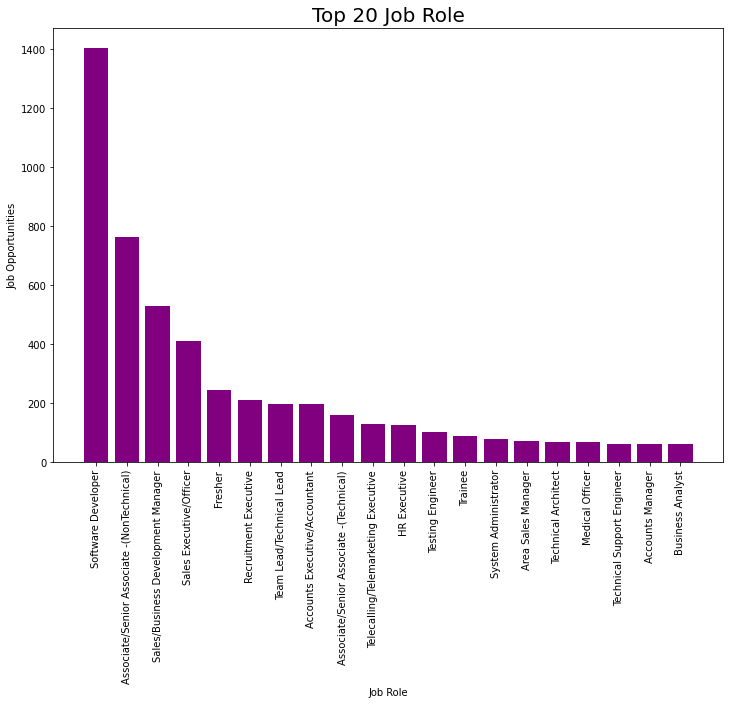

In [18]:
plt.figure(figsize = (12, 8))
plt.bar(top_20_new_Job_Role.Role, top_20_new_Job_Role.Job_Opportunities, color = "purple")
plt.xlabel("Job Role")
plt.ylabel("Job Opportunities")
plt.xticks(top_20_new_Job_Role.Role, rotation = "90")
plt.title("Top 20 Job Role", fontdict={"fontsize" :20})
plt.show()

# Visualizing All the Industries with respect to Locations

In [19]:
city_industries = pd.DataFrame({"Location": data.Location.str.split(",", expand = True)[0],"Industry": data.Industry.str.split(",", expand = True)[0]})
city_industries.dropna(inplace = True)
new_CT_IND = pd.crosstab(city_industries.Location, city_industries.Industry).reset_index()
new_CT_IND = new_CT_IND.melt(id_vars = "Location", value_name = "Job_Opportunities")
new_CT_IND = new_CT_IND.sort_values(by = ["Industry", "Job_Opportunities"], ascending = False).reset_index(drop = True)
new_CT_IND = new_CT_IND.dropna()
new_CT_IND = new_CT_IND.sort_values(by = "Job_Opportunities", ascending = False).reset_index(drop = True)

# in classy data frame is only for getting top 20 Industry Name
classy = new_CT_IND.groupby("Industry").sum().reset_index().sort_values(by = "Job_Opportunities", ascending = False)[:20]
# saved industry name in list for fetching only 5 same name industry or only five Location of particular indusry
Industry_20_lst = classy.Industry.reset_index(drop = True)
limit = 0
pure_loc_Ind = pd.DataFrame(columns=["Location", "Industry", "Job_Opportunities"])
for j in range(20):
    limit = 0
    for i in range (new_CT_IND.size):
        if limit == 5:
            break
        if Industry_20_lst[j] == new_CT_IND.loc[i, "Industry"]:
            pure_loc_Ind = pure_loc_Ind.append(new_CT_IND.loc[i], ignore_index = True)
            limit += 1
# yeeeah i did it :)
# plot pie chart of top 5 location of top 20 Industry
for i in Industry_20_lst:
    classy = pure_loc_Ind.loc[pure_loc_Ind.Industry == i, ["Location", "Job_Opportunities"]]
    fig = px.pie(classy, names = "Location", values = "Job_Opportunities", color = "Location",title = "Top 5 Location for " + i + " Industry")
    fig.show()

## Visualizing Key Skills

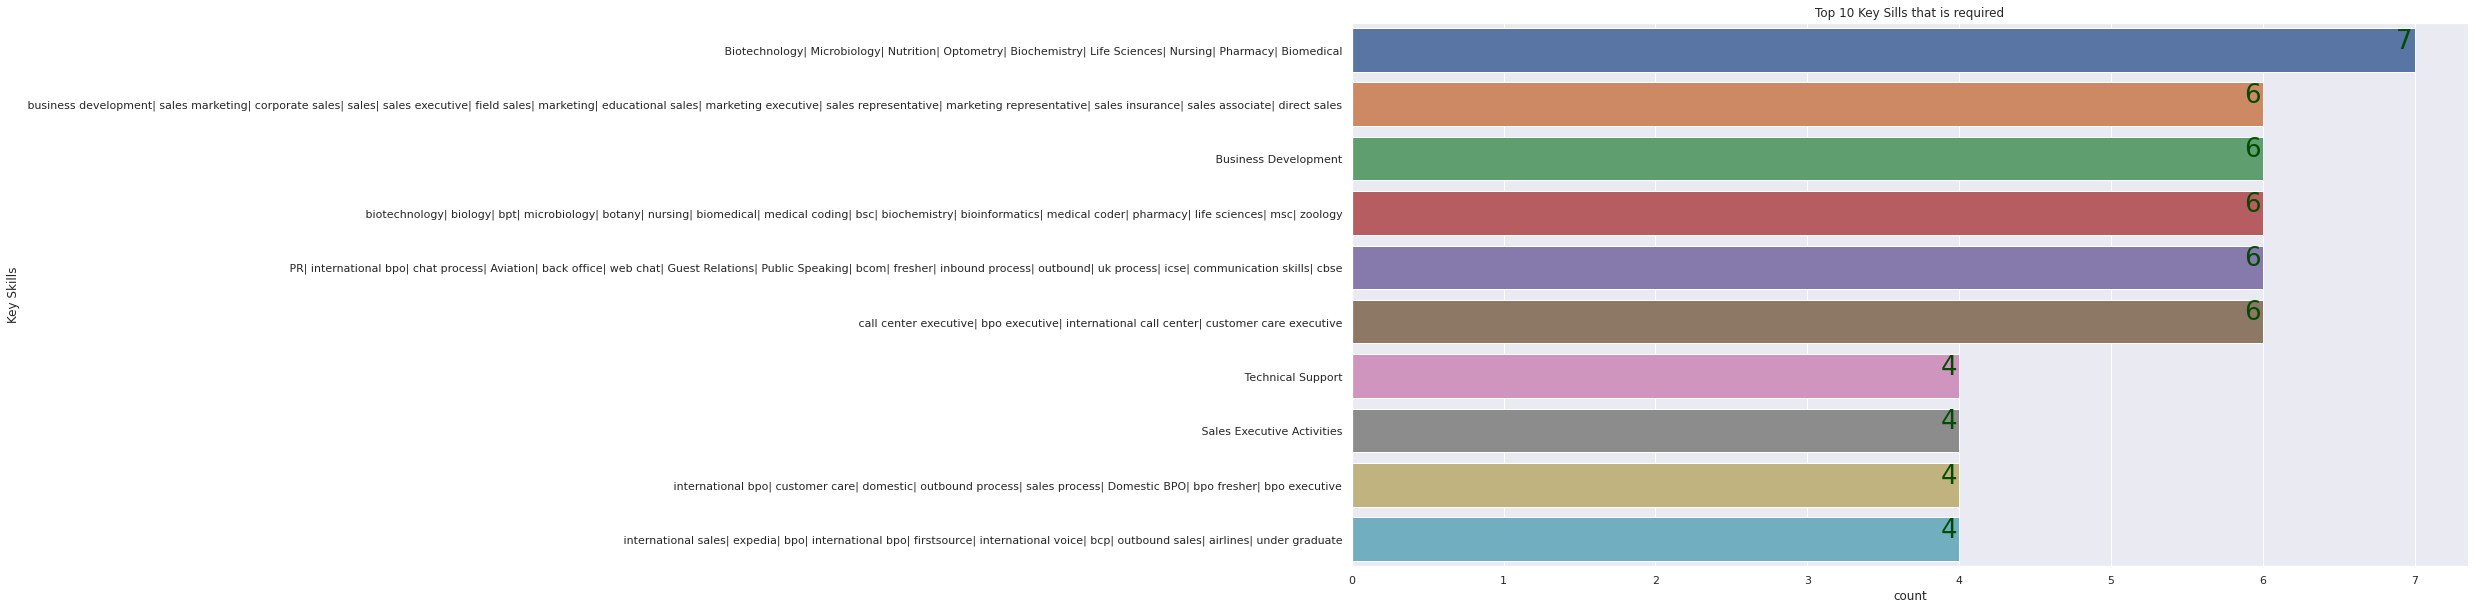

In [20]:
plt.figure(figsize = (20, 10))
sns.set(style = "darkgrid")
ax = sns.countplot(y = 'Key Skills', data = data,order = data['Key Skills'].value_counts().iloc[:10].index)
for p in ax.patches:
    ax.annotate(int(p.get_width()), ((p.get_x() + p.get_width()), p.get_y()), xytext=(-2, -20),fontsize = 26, color = '#004d00', textcoords = 'offset points', horizontalalignment = 'right')
plt.title('Top 10 Key Sills that is required')
plt.show()

## Visualizing Job Oppurtunities With respect to Job Experience

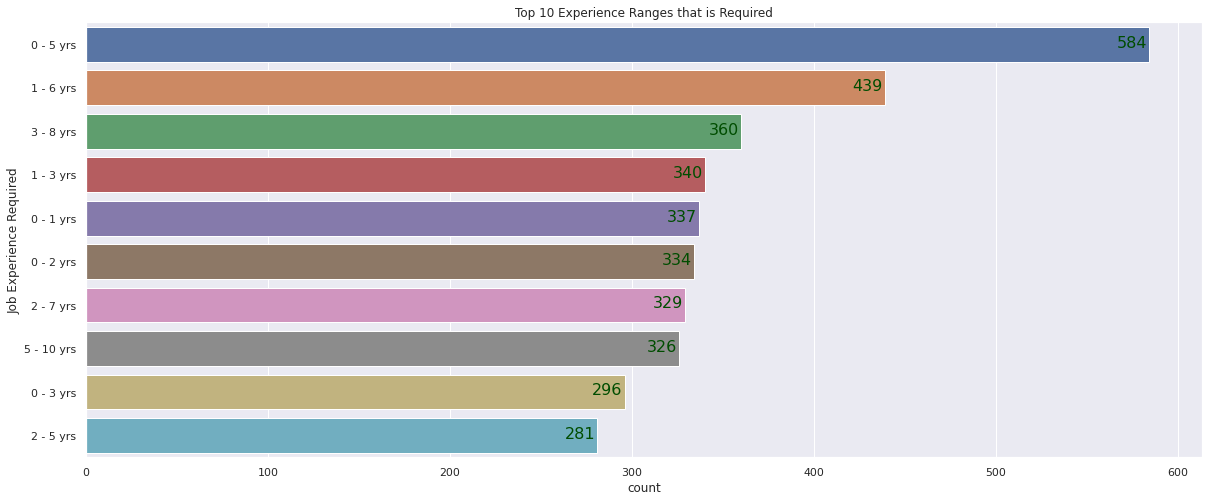

In [21]:
plt.figure(figsize = (20, 8))
sns.set(style = "darkgrid")
ax = sns.countplot(y = 'Job Experience Required', data = data,order = data['Job Experience Required'].value_counts().iloc[:10].index)
for p in ax.patches:
    ax.annotate(int(p.get_width()), ((p.get_x() + p.get_width()), p.get_y()), xytext = (-2, -20),fontsize = 16, color = '#004d00', textcoords = 'offset points', horizontalalignment = 'right')
plt.title('Top 10 Experience Ranges that is Required')
plt.show()

In [22]:
co = list(data['Job Experience Required'].value_counts().iloc[:10].index)
data['Job Experience Required'] = np.where(data['Job Experience Required'].isin(co),data['Job Experience Required'],'Others')

In [23]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Pie(labels = data['Job Experience Required'].value_counts().index,values = data['Job Experience Required'].value_counts(),pull = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])])
fig.update_traces(textfont_size = 20,marker = dict(line = dict(color='#000000', width = 2)))
fig.show()

# Visualizing Role Categories

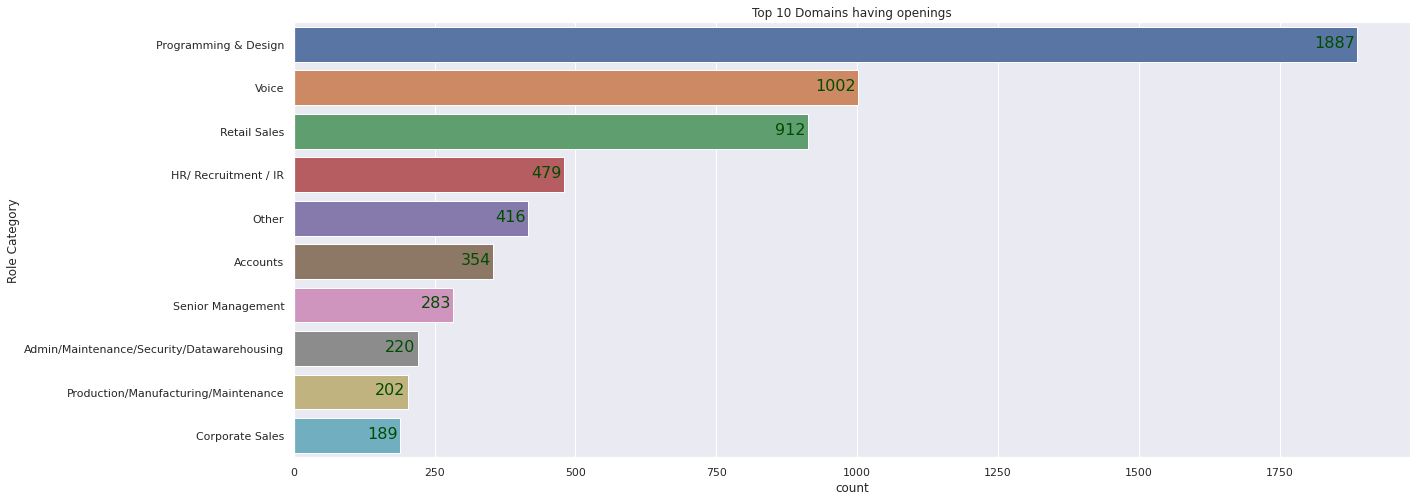

In [24]:
plt.figure(figsize = (20, 8))
sns.set(style = "darkgrid")
ax = sns.countplot(y = 'Role Category', data = data,order = data['Role Category'].value_counts().iloc[:10].index)
for p in ax.patches:
    ax.annotate(int(p.get_width()), ((p.get_x() + p.get_width()), p.get_y()), xytext = (-2, -20), fontsize = 16, color = '#004d00', textcoords = 'offset points', horizontalalignment = 'right')
plt.title('Top 10 Domains having openings')
plt.show()

## Visualizing Key Skills in Word Board

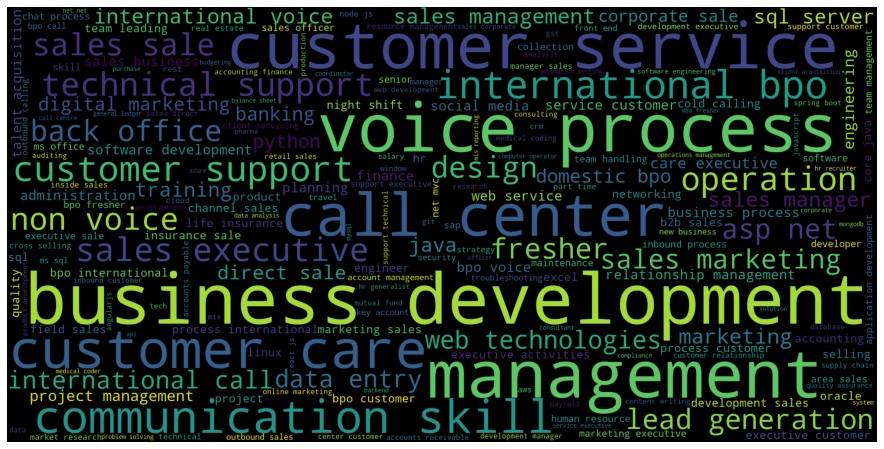

In [25]:
from wordcloud import WordCloud
skills = data['Key Skills'].to_list()
skills = [str(s) for s in skills]
skills = [s.strip().lower()  for i in skills for s in i.split("|")]
skills = " ".join(w for w in skills)
wc = WordCloud(width = 2000, height = 1000).generate(skills)
plt.figure(figsize = (16, 8))
plt.imshow(wc)
plt.axis('off')
plt.show()

## Visualizing Train and Test datasets

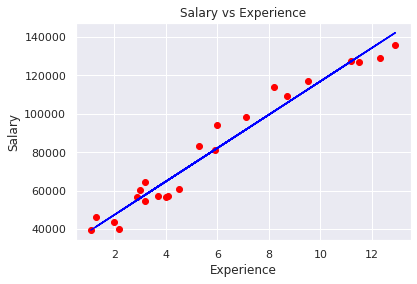

In [26]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,reg.predict(x_train),color="blue")
plt.title('Salary vs Experience')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

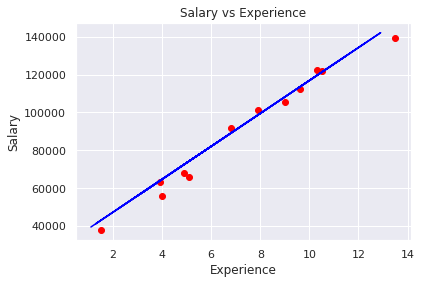

In [27]:
plt.scatter(x_test,y_test,color="red")
plt.plot(x_train,reg.predict(x_train),color="blue")
plt.title('Salary vs Experience')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

## Visualizing Predicted Datasets with respect to Experience

In [28]:
y_pred=reg.predict(x_test)
pd.DataFrame(y_pred,columns=["Salary"])

,Salary
0,121240.470359
1,89080.021635
2,74303.599249
3,119502.067726
4,98641.236121
5,72565.196615
6,63873.183446
7,43012.351841
8,64742.384763
9,113417.658508


In [29]:
new_salary=reg.predict([[6]])
print("salary is",new_salary)

salary is [82126.41110037]


# A Salary Predicter (Please give years of experience)

In [30]:
a=float(input("Enter your no of years experience (you can give in float) "))
new_salary=reg.predict([[a]])
ne_salary=str(new_salary)
print("Your predicted salary will be ",ne_salary[1:-1])

Enter your no of years experience (you can give in float) 5.8
Your predicted salary will be  80388.00846663


## Testing the Accuracy of our Model

In [31]:
acc=(reg.score(x_test,y_test))
acc

0.9737903397670055